# Part II - (Ford go bike presentation)
## by (Fahd Ashraf)

## Investigation Overview


> What is the key behavioral differences bteween Subscribers and Customers?, how we achieved an answer for that question lies in the next slides

## Dataset Overview

> our dataset contain 183412 instances with 18 features and it discribes certain properties of each ride

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.start_time =pd.to_datetime(df.start_time)
df.end_time =pd.to_datetime(df.end_time)
df['start_day']=df.start_time.dt.day_name()
df['end_day']=df.end_time.dt.day_name()
df['age']= 2022 - df.member_birth_year


## (Visualization 1)

> it is important to know what age group is dominating the use of our bikes and we have discovered that our users peak at 30 to 40 years range with a spread from 20 to 50 years

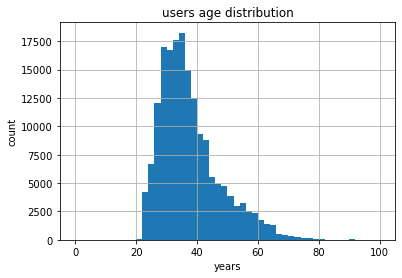

In [11]:
df.age.hist(bins= 50,range=(0,100));
plt.title('users age distribution');
plt.xlabel('years');
plt.ylabel('count');

## (Visualization 2)

> now when we see how much do people ride our bikes for we found that the most rides from a range of 5 minutes to 15 minutes 

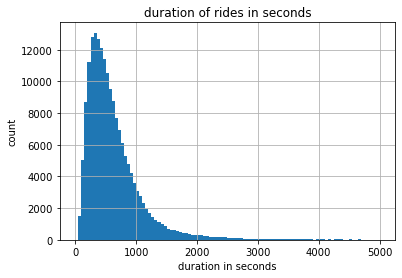

In [12]:
df.duration_sec.hist(bins=100,range=(0,5000));
plt.title('duration of rides in seconds');
plt.xlabel('duration in seconds');
plt.ylabel('count');

## (Visualization 3)

> now to differentiate between subscribers and customers we need to find how they use the bikes diffrently and so after our analysis we now know that subscribers tend to not use their bikes during the weekends 

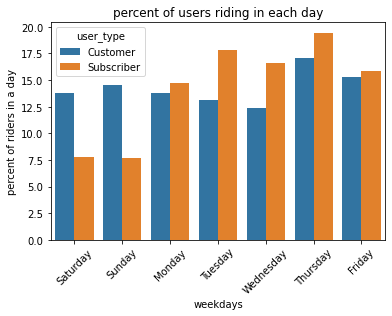

In [16]:
order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
week_days =(
    df.groupby(['user_type'])['start_day']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
    .sort_values('start_day')
)
sb.barplot(x='start_day',y='percentage',hue='user_type',data=week_days,order=order);
plt.title('percent of users riding in each day');
plt.xlabel('weekdays');
plt.ylabel('percent of riders in a day');
plt.xticks(rotation=45);

## (Visualization 4)

> Also we have figured out that on a daily basis customers' average ride is longer than that of subscribers, and it peakes in the weekednds

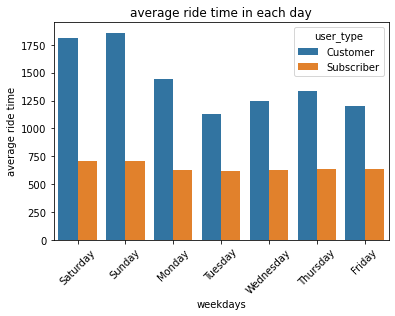

In [18]:
avg = df.groupby(['start_day','user_type'])['duration_sec'].mean().reset_index()
sb.barplot(x=avg.start_day,y=avg.duration_sec,hue=avg.user_type,order=order);
plt.title('average ride time in each day');
plt.xticks(rotation=45);
plt.xlabel('weekdays');
plt.ylabel('average ride time');

In [22]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 705991 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\fahda\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\fahda\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\fahda\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\fahda\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\fahda\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fil

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 